In [1]:
import pandas as pd
import numpy as np

import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

from datetime import datetime

In [3]:
df = pd.read_pickle("data/df_limpio1.pkl")
df.head(2)

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
0,2018-01-01,Invierno,2018,enero,no_festivo,lunes,0,2,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Invierno,2018,enero,no_festivo,jueves,0,2,17.68695,69.6087,16.652113,131,670,801


In [4]:
#Hacemos dos listas con variables numéricas y variables categóricas

lista_num = ['sensacion_termica', 'humedad', 'velocidad_viento', 'alquiler_casual', 'alquiler_registrado', 'total_alquileres']
lista_cat = ['estacion', 'año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']
lista_cat2 = ['año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']

In [5]:
dict(enumerate(lista_num))

{0: 'sensacion_termica',
 1: 'humedad',
 2: 'velocidad_viento',
 3: 'alquiler_casual',
 4: 'alquiler_registrado',
 5: 'total_alquileres'}

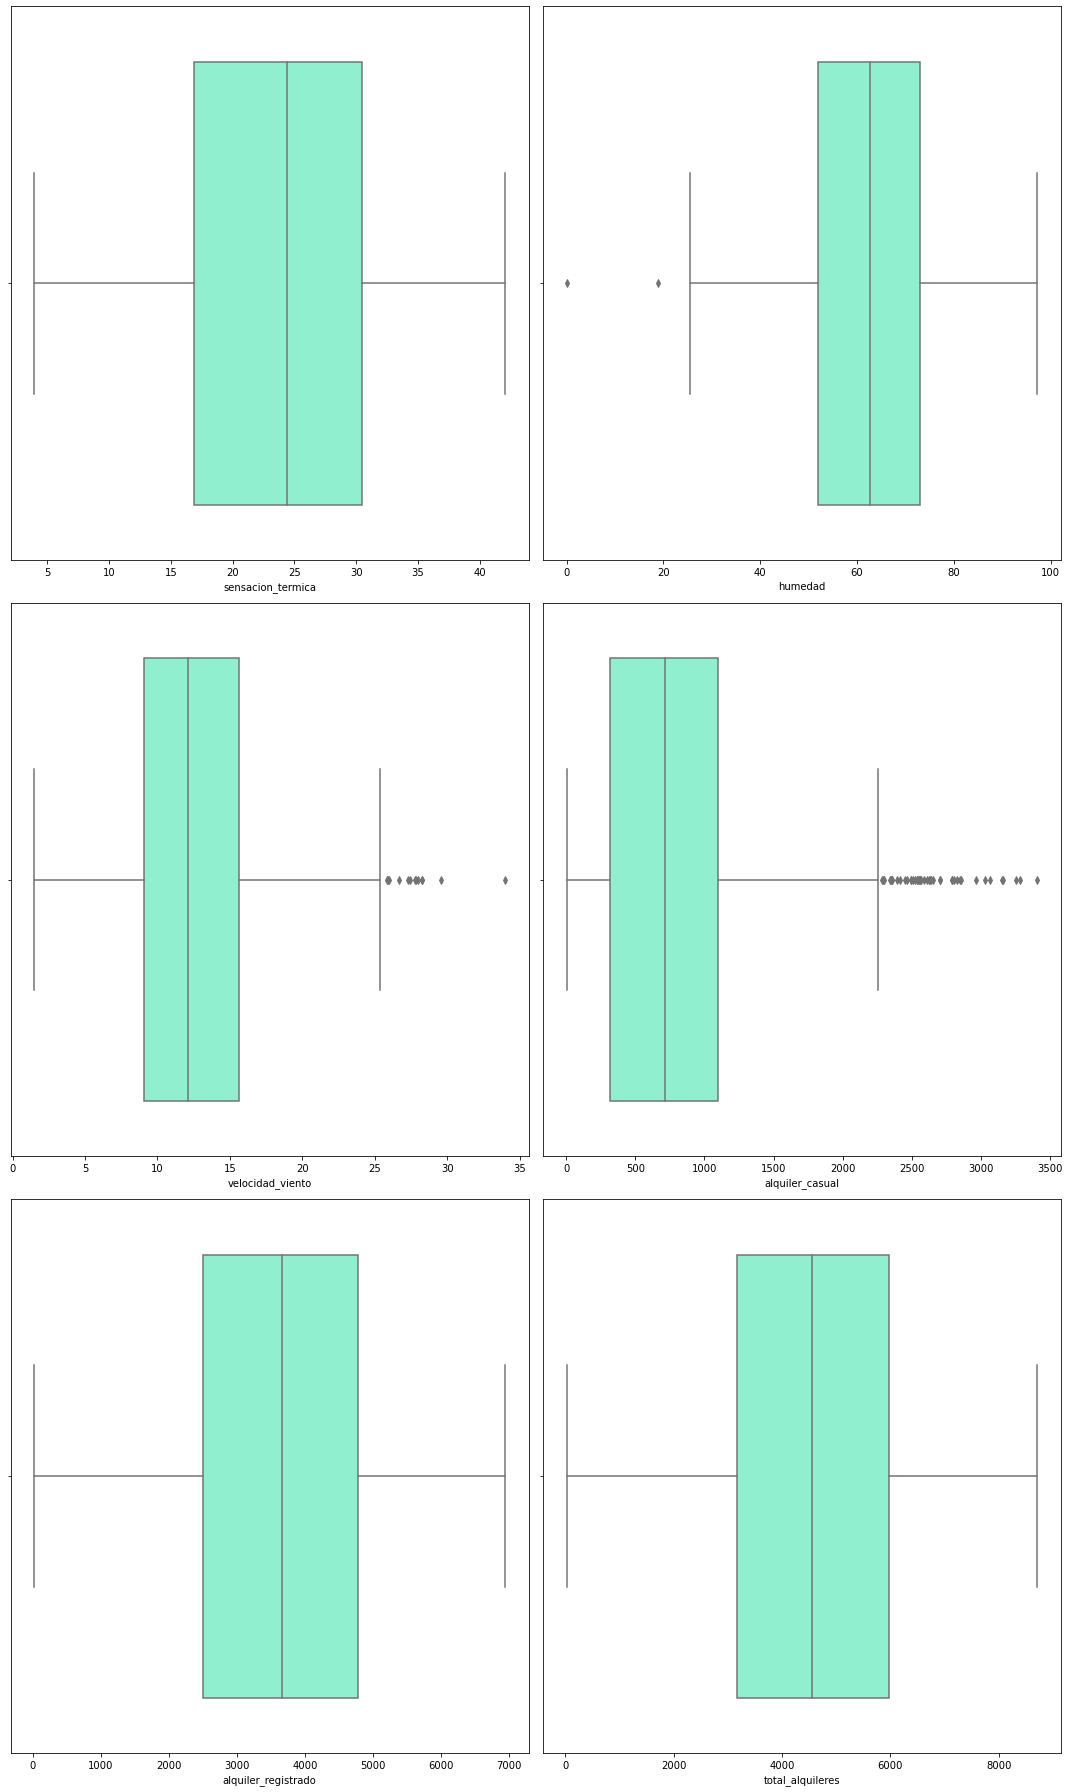

In [8]:
#Realizamos los boxplot de las variables numéricas

fig, axes = plt.subplots(3, 2, figsize=(15, 25))
axes = axes.flat

for indice, elemento in enumerate(lista_num):
    sns.boxplot(x = elemento, data = df, ax=axes[indice], color = "aquamarine")
    
    
plt.tight_layout()
plt.show();

CONCLUSIONES

Estas son las columnas que presentan outliers:

    -humedad: consideramos que humedad 0 es un error ya que es un valor que sólo se da en desiertos. Es sólo 1 registro así que cambiamos el valor por la media.
    -velocidad_viento: Entendemos que las medidas están en nudos. Entre 17 -22 nudos se considera fresco, entre 22 - 34 se considera fuerte y por encima de 34 nudos se considera temporal. Sólo tenemos un solo registro por encima de 34. Como nos parece un registro real, decidimos dejarlo como está.
    -alquiler_casual: 

In [9]:
df[df['humedad'] == 0]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
68,2018-10-03,Otoño,2018,marzo,no_festivo,miercoles,1,3,19.2834,0.0,17.545759,46,577,623


In [10]:
df[df['velocidad_viento'] >= 34]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
49,2018-02-19,Invierno,2018,febrero,no_festivo,lunes,0,1,19.5702,18.7917,34.000021,532,1103,1635


In [12]:
df[df['total_alquileres'] > 2250].shape


(613, 14)

In [ ]:
#Realizamos los boxplot de las variables categoricas

fig, axes = plt.subplots(3, 2, figsize=(15, 25))
axes = axes.flat

for indice, elemento in enumerate(lista_cat2):
    sns.boxplot(y = elemento, data = df, ax=axes[indice], color = "salmon")
    
    
plt.tight_layout()
plt.show()

In [ ]:
df['festivo'].value_counts()

CONCLUSION

Hay outliers en la columna de festivos, ya que hay bastante más días que no son festivos (0) que días que son festivos (1)